In [233]:
#Change the following variables
file_name = 'knee_moment_z.txt'

In [234]:
#import the libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#import standard scaler
from sklearn.preprocessing import StandardScaler

#import the PCA function
from sklearn.decomposition import PCA

In [235]:
#create the working directory
os.chdir('/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/metric_matrices/individual_means')
data_directory = os.path.join(os.getcwd(), 'all_groups_z_transform')
directory = sorted(os.listdir(data_directory))
#directory.remove('.DS_Store')
directory

['ankle_angle_x.txt',
 'ankle_angle_y.txt',
 'ankle_angle_z.txt',
 'ankle_moment_x.txt',
 'ankle_moment_y.txt',
 'ankle_moment_z.txt',
 'hip_angle_x.txt',
 'hip_angle_y.txt',
 'hip_angle_z.txt',
 'hip_moment_x.txt',
 'hip_moment_y.txt',
 'hip_moment_z.txt',
 'knee_angle_x.txt',
 'knee_angle_y.txt',
 'knee_angle_z.txt',
 'knee_moment_x.txt',
 'knee_moment_y.txt',
 'knee_moment_z.txt']

In [236]:
#set variable as file path for file and labels
file_path = os.path.join(data_directory,file_name)
labels_path = '/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/PCA_matrices//individual_means/labels_recovered_split.txt'

#load the file
X = pd.read_csv(file_path,sep='\t', header=None)
#load the labels
Y = pd.read_csv(labels_path,sep='\t')

In [237]:
#initialize the principal component analysis
pca = PCA()

#call the fit_transform() on raw_file to simultaneously compute the weights of the principal
#components and then transform raw_file to produce the new set of principal components of raw_file
#store in the df_PCA object, which is a pandas dataframe
df_pca = pca.fit_transform(X=X)

#store as a dataframe and print
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.round(2).head()

(96, 96)


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-2.18,-0.86,1.33,-0.35,-0.02,-0.42,-0.61,0.49,-0.02,-0.03,...,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
1,2.00,-3.85,0.50,0.95,-0.69,-0.78,-0.84,1.16,0.23,-0.19,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
2,-0.68,-2.27,-1.72,-0.83,-1.02,-0.52,1.03,-0.45,-0.16,0.52,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
3,15.37,4.00,-0.90,0.38,-0.21,-0.72,0.35,-0.27,0.35,-0.19,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
4,-2.74,-0.14,-0.55,0.04,-0.15,1.24,-0.54,-0.02,0.59,-0.25,...,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0


In [238]:
#now we have built a principal component analysis

#get the principal component weights (or loadings), which are also known as the eigenvectors
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

#export the weights 
df_pca_loadings.to_csv('/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/PCA_matrices/individual_means/loadings/loadings_'+file_name, sep='\t')

In [239]:
#compute the mean centered data to check if you can resolve the original data via the dot product 
X_mean = X - X.mean()
X_mean.head()

#take the dot product of the weights and the mean centered values. This should give you
#the same entries as the matrix that contains the principal component data frame, or df_pca

#this is just a check to make sure that you can get back to the initial data

#as an example, compute the dot product for the first row and first column
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[0, :]) 

-2.176424045668643

In [240]:
#list the explained variance of each principal component to see how many weights we are going
#to need to pull from the weights matrix
#we want to capture 90% of the total variance in the data, so we must take enough weights
#to get to that 90% threshold. 
#the principal component analysis will give you a principal component for each feature,
#so in this case we have 101 principal components
print(pca.explained_variance_ratio_.round(2)[:10])
#for the biceps femoris, we need the first 6 principal components to capture 90% of the
#variance in the data

[0.74 0.14 0.05 0.02 0.01 0.01 0.01 0.   0.   0.  ]


In [241]:
#creating a function called encircle
#this function will encircle all of the data points for a particular group 
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

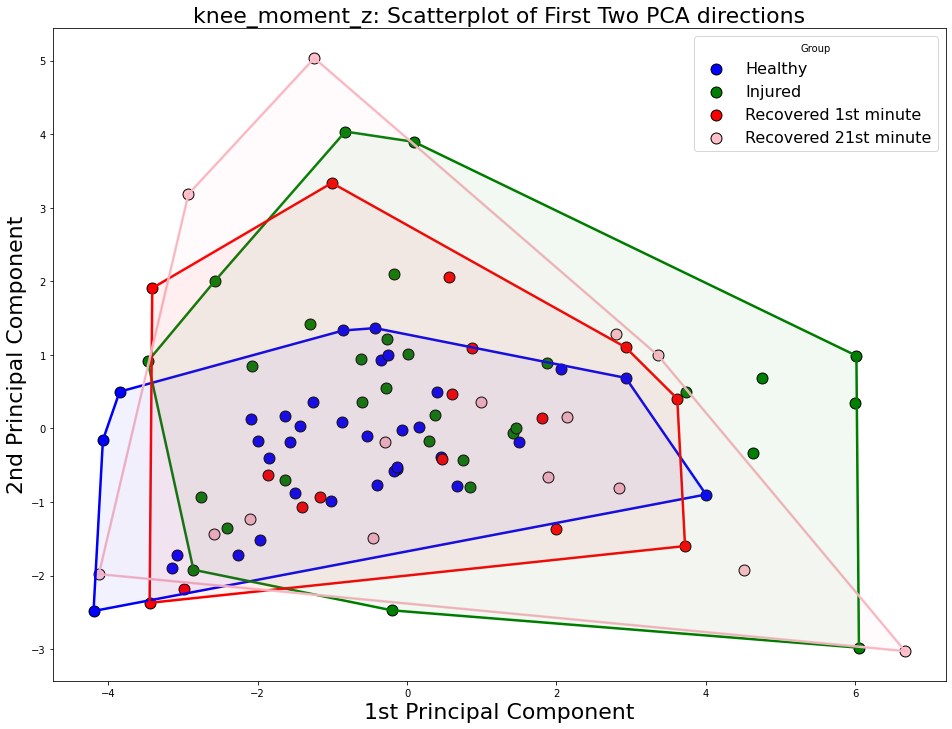

In [242]:
#scatter plot of all of the data on PC1 and PC2 which explain x% of the varaince
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
#these assign variables rows_n to the rows that contain the particular labels from Y
Y_series = Y.squeeze()
rows_1 = Y_series==1;
rows_2 = Y_series==2; 
rows_3 = Y_series==3;
rows_4 = Y_series==4;
#rows_5 = Y_series==5;
#rows_6 = Y_series==6;

#Plot the data
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='blue', edgecolor='k', s=120, label='Healthy')
ax.scatter(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], c='green', edgecolor='k', s=120, label='Injured')
ax.scatter(df_pca.loc[rows_3.tolist(), 1], df_pca.loc[rows_3.tolist(), 2], c='red', edgecolor='k', s=120, label='Recovered 1st minute')
ax.scatter(df_pca.loc[rows_4.tolist(), 1], df_pca.loc[rows_4.tolist(), 2], c='pink', edgecolor='k', s=120, label='Recovered 21st minute')
#ax.scatter(df_pca.loc[rows_5.tolist(), 1], df_pca.loc[rows_5.tolist(), 2], c='red', edgecolor='k', s=120, label='Recovered 1 min')
#ax.scatter(df_pca.loc[rows_6.tolist(), 1], df_pca.loc[rows_6.tolist(), 2], c='coral', edgecolor='k', s=120, label='Recovered 21 min')


#encircle the boundaries
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="green", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_3.tolist(), 1], df_pca.loc[rows_3.tolist(), 2], ec="red", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_4.tolist(), 1], df_pca.loc[rows_4.tolist(), 2], ec="pink", fc="none", linewidth=2.5)
#encircle(df_pca.loc[rows_5.tolist(), 1], df_pca.loc[rows_5.tolist(), 2], ec="red", fc="none", linewidth=2.5)
#encircle(df_pca.loc[rows_6.tolist(), 1], df_pca.loc[rows_6.tolist(), 2], ec="coral", fc="none", linewidth=2.5)

# Shading
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="blue", alpha=0.05)
encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="k", fc="green", alpha=0.05)
encircle(df_pca.loc[rows_3.tolist(), 1], df_pca.loc[rows_3.tolist(), 2], ec="k", fc="red", alpha=0.05)
encircle(df_pca.loc[rows_4.tolist(), 1], df_pca.loc[rows_4.tolist(), 2], ec="k", fc="pink", alpha=0.05)
#encircle(df_pca.loc[rows_5.tolist(), 1], df_pca.loc[rows_5.tolist(), 2], ec="k", fc="red", alpha=0.05)
#encircle(df_pca.loc[rows_6.tolist(), 1], df_pca.loc[rows_6.tolist(), 2], ec="k", fc="coral", alpha=0.05)


# Labels
ax.set_title(file_name[:-4]+": Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Group', fontsize=16)
plt.savefig('/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/plots/PCA_plots/'+file_name[:-4])

plt.show();


In [243]:
#this cell will export the weights, but we dont actually need those for anything

#df_pca_loadings.to_csv('/Users/rossbrancati/Desktop/PFP_Project/EMG/PCA_matrices/PCA_weights/'+file_name[11:], sep='\t')

In [244]:
#I actually want to export this file because it will be 1336x101. Then you look at the weights, pick the PC's that 
#capture 95% of the variance, save the number of columns that is equivalent to this number of weights, and then add 
#these into a matrix with the the other muscles. So lets say each muscle takes 5 PC's to cover 95% of the variance:
#your PC score's matrix will be 1336 rows by (11x5) or 55 columns wide

df_pca.to_csv('/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/PCA_matrices/individual_means/PCA_scores/'+file_name, sep='\t')

In [245]:
np.savetxt('/Users/rossbrancati/Desktop/PFP_Project/kinetic_kinematic/Data/PCA_matrices/individual_means/explained_variance/explained_var_'+file_name, pca.explained_variance_ratio_.round(2), delimiter=",", fmt='%f')